# 112 路径总和
输入：给定二叉树，和一个目标和  
输出：判断是否满足 从根节点到叶子结点的路径上所有节点值之和等于目标和 的路径

## 思路
本题中的遍历从根节点到叶子节点，自顶向下，常见的就是类似于求深度的后序遍历

### 递归法
关于递归是否需要设置返回值：  
- 如果需要搜索整棵二叉树且不用处理递归返回值，递归函数就不要返回值。（这种情况就是本文下半部分介绍的113.路径总和ii）  
- 如果需要搜索整棵二叉树且需要处理递归返回值，递归函数就需要返回值。 （这种情况我们在236. 二叉树的最近公共祖先 (opens new window)中介绍）   
- 如果要搜索其中一条符合条件的路径，那么递归一定需要返回值，因为遇到符合条件的路径了就要及时返回。（本题的情况）  

所以本题中不需要遍历整棵树，每次递归只要找到符合要求的路径就可以返回了  

代码实现的时候，实现顺序按照三个要素的顺序去写  

1. 参数和返回类型
   - 参数：根节点（路径起点）和一个计数器count，用来记录路径上的节点之和
   - 返回值：布尔类型

2. 终止条件  
   - count 刚好等于目标和  
   - 小trick：count初始化为目标和，每次减去路径上的节点值，最后判断是否等于0即可  
   - 遍历到叶子节点，此时count==0，就说明找到了目标路径，可以反悔了

3. 递归逻辑  
   - 保证递归过程中没有空节点，如果递归函数返回true就立刻返回

In [ ]:
# 递归
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

class Solution:
    def traversal(self, cur:TreeNode, count:int) -> bool:
        # 遇到叶子节点且计数恰好减小到0，
        if not cur.left and not cur.right and count == 0:
            return True
        # 遍历到叶子节点但count不为0，直接返回
        if not cur.left and not cur.right:
            return False
        
        if cur.left:
            count -= cur.left.val
            if self.traversal(cur.left, count):
                return True
            count += cur.left.val   # 执行到这就说明前面路径不匹配，回溯撤销处理结果

        if cur.right:  # 右孩子处理同理
            count -= cur.right.val
            if self.traversal(cur.right, count):
                return True
            count += cur.right.val
        
        return False
    
    def hasPathSum(self, root:TreeNode, target:int) -> bool:
        if not root:
            return False
        return traversal(root, target - root.val)      # 从根节点开始乡下搜索，一定要记得减掉根节点啊啊啊啊啊啊 

### 迭代法
用栈模拟递归

实现回溯：栈中的元素存储一个元组，（节点指针，从头结点到该节点的路径数值之和）

In [ ]:
class Solution:
    def hasPathSum(self, root:TreeNode, target:int) -> bool:
        if not root:
            return False
        # 此时栈里要放的是pair<节点指针，路径数值>
        st = [(root, root.val)]
        while st:
            node, path_sum = st.pop()
            # 遇到叶子节点：判断数值是否等于target
            if not node.left and not node.right and path_sum == target:
                return True
            # 右节点压栈，并记录数值（前序遍历入栈：右左中）
            if node.right:
                st.append((node.right, path_sum + node.right.val))
            # 左节点压栈
            if node.left:
                st.append((node.left, path_sum + node.left.val))
            
        return False


# 113 路经总和Ⅲ
找到从根节点到叶子节点，所有节点和等于目标值的路径并返回路径的节点元素

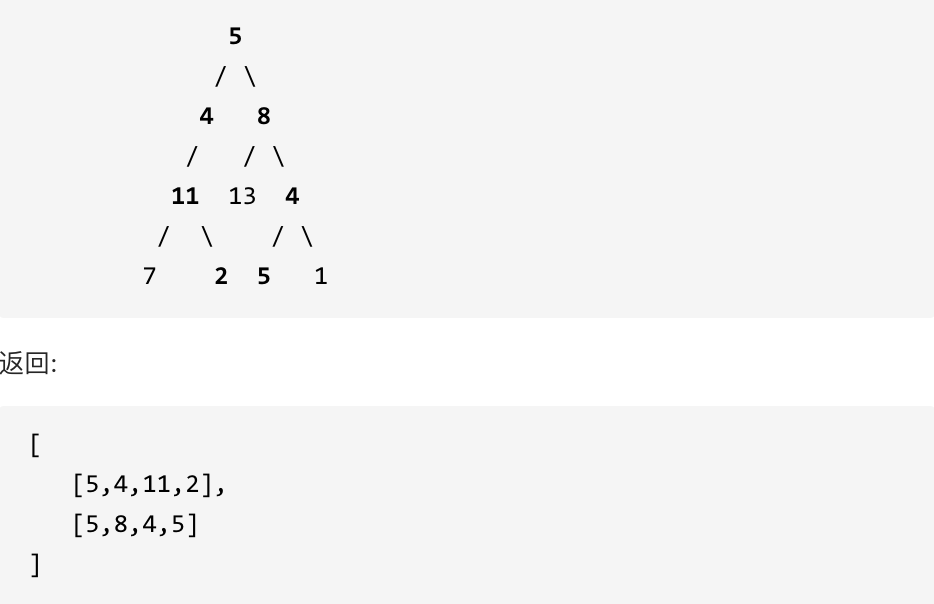

## 思路
这一次需要找到所有路径！

所以递归不用返回值！！！

同样是递归 + 回溯：  

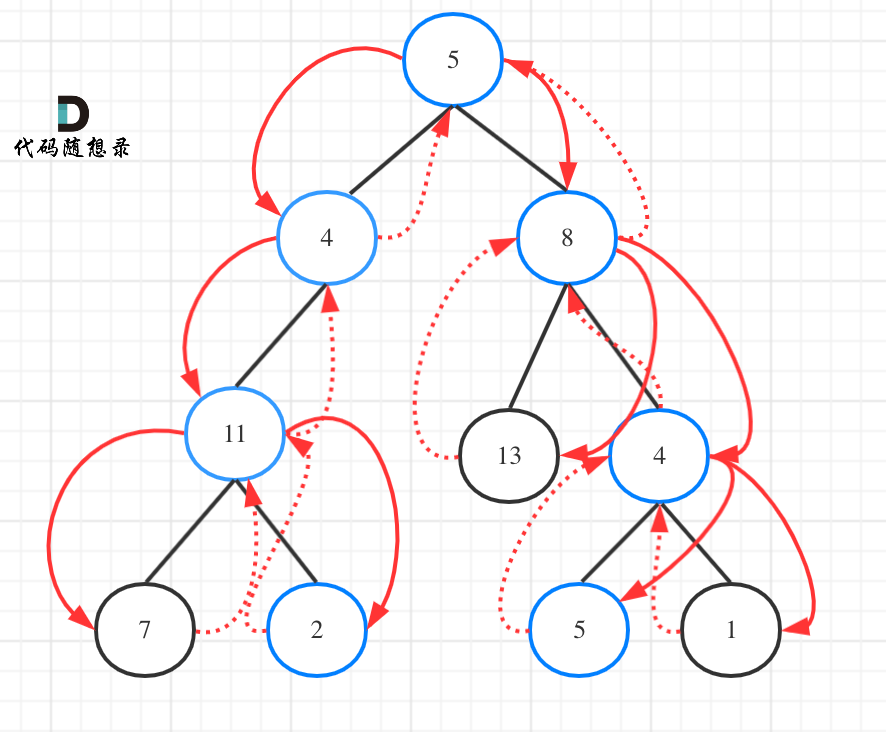

In [ ]:
# 迭代法
# 栈模拟递归,前序遍历

class Solution:
    def pathSum(self, root: Optional[TreeNode], targetSum: int) -> List[List[int]]:
        if not root:
            return []
        # 入栈元素：（节点指针，记录的路径上所有节点值列表）
        stack = [(root, [root.val])]
        result = []   # 存放符合要求的路径
        
        while stack:
            node, path = stack.pop()
            if not node.left and not node.right and sum(path) == targetSum:
                result.append(path)
            if node.right:
                stack.append((node.right, path + [node.right.val]))   # 列表拼接新的节点值作为新路径
            if node.left:
                stack.append((node.left, path + [node.left.val]))
        
        return result